In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

**Point a**

In [24]:
# Define the directory of the train data
from pathlib import Path
train_data_dir = Path('train')

def data_(file_name):
    sample_file = os.path.join(train_data_dir, file_name)
    bearing_data = pd.read_csv(sample_file, delimiter=';')    

    return bearing_data

bearing_data_0 = data_('0.csv')
print(bearing_data_0.head())
print(f"Number of columns detected: {len(bearing_data_0.columns)}")

     b1x    b1y    b4x    b4y
0 -0.022 -0.039 -0.129 -0.142
1 -0.105 -0.017 -0.115 -0.122
2 -0.183 -0.098 -0.171 -0.071
3 -0.178 -0.161 -0.112 -0.078
4 -0.208 -0.129 -0.063 -0.066
Number of columns detected: 4


In [25]:
# Rename columns for better readability
bearing_data_0.columns = ['b1x', 'b1y', 'b4x', 'b4y']

# Convert the columns to numeric
bearing_data_0 = bearing_data_0.apply(pd.to_numeric)

# Calculate mean
bearing_data_0['b1_mean'] = bearing_data_0[['b1x', 'b1y']].mean(axis=1)

# Calculate standard deviation
bearing_data_0['b1_std'] = bearing_data_0[['b1x', 'b1y']].std(axis=1)

# Calculate range
bearing_data_0['b1_range'] = bearing_data_0[['b1x', 'b1y']].apply(lambda row: row.max() - row.min(), axis=1)

# Calculate rolling mean and rolling standard deviation
window_size = 50
bearing_data_0['b1x_rolling_mean'] = bearing_data_0['b1x'].rolling(window=window_size).mean()
bearing_data_0['b1y_rolling_mean'] = bearing_data_0['b1y'].rolling(window=window_size).mean()
bearing_data_0['b1x_rolling_std'] = bearing_data_0['b1x'].rolling(window=window_size).std()
bearing_data_0['b1y_rolling_std'] = bearing_data_0['b1y'].rolling(window=window_size).std()

# Calculate kurtosis
bearing_data_0['b1x_kurtosis'] = bearing_data_0['b1x'].rolling(window=window_size).apply(kurtosis)
bearing_data_0['b1y_kurtosis'] = bearing_data_0['b1y'].rolling(window=window_size).apply(kurtosis)

# Calculate skewness
bearing_data_0['b1x_skewness'] = bearing_data_0['b1x'].rolling(window=window_size).apply(skew)
bearing_data_0['b1y_skewness'] = bearing_data_0['b1y'].rolling(window=window_size).apply(skew)

# Calculate RMS
bearing_data_0['b1x_rms'] = np.sqrt(bearing_data_0['b1x'].rolling(window=window_size).mean())
bearing_data_0['b1y_rms'] = np.sqrt(bearing_data_0['b1y'].rolling(window=window_size).mean())

# Calculate Peak-to-Peak Value
bearing_data_0['b1x_peak_to_peak'] = bearing_data_0['b1x'].rolling(window=window_size).apply(lambda x: x.max() - x.min())
bearing_data_0['b1y_peak_to_peak'] = bearing_data_0['b1y'].rolling(window=window_size).apply(lambda x: x.max() - x.min())

bearing_data_0.head()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,b1x,b1y,b4x,b4y,b1_mean,b1_std,b1_range,b1x_rolling_mean,b1y_rolling_mean,b1x_rolling_std,b1y_rolling_std,b1x_kurtosis,b1y_kurtosis,b1x_skewness,b1y_skewness,b1x_rms,b1y_rms,b1x_peak_to_peak,b1y_peak_to_peak
0,-0.022,-0.039,-0.129,-0.142,-0.0305,0.012021,0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.105,-0.017,-0.115,-0.122,-0.0610,0.062225,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.183,-0.098,-0.171,-0.071,-0.1405,0.060104,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.178,-0.161,-0.112,-0.078,-0.1695,0.012021,0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.208,-0.129,-0.063,-0.066,-0.1685,0.055861,0.079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Point b**

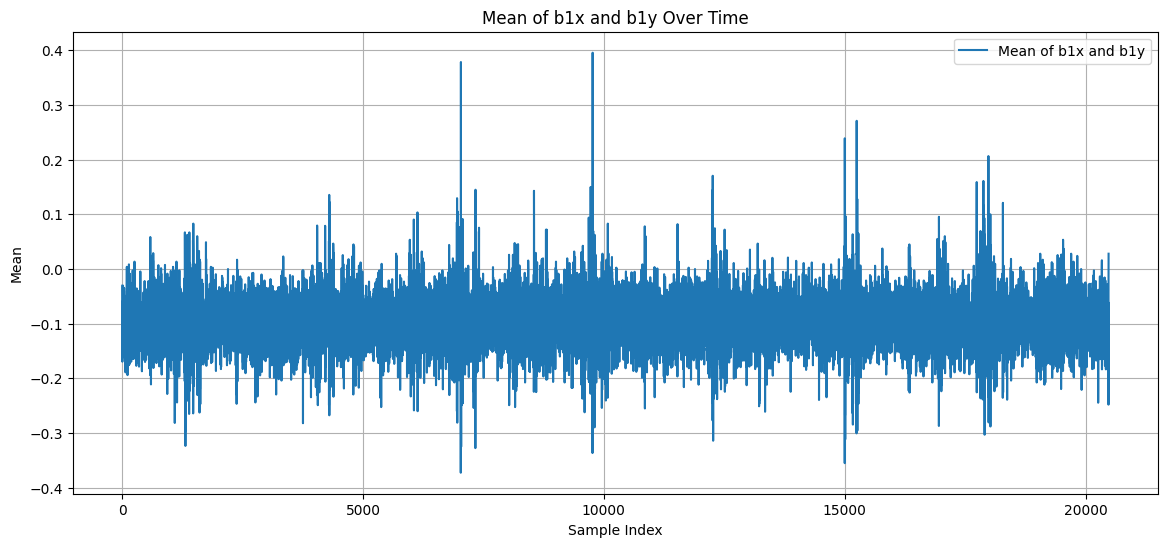

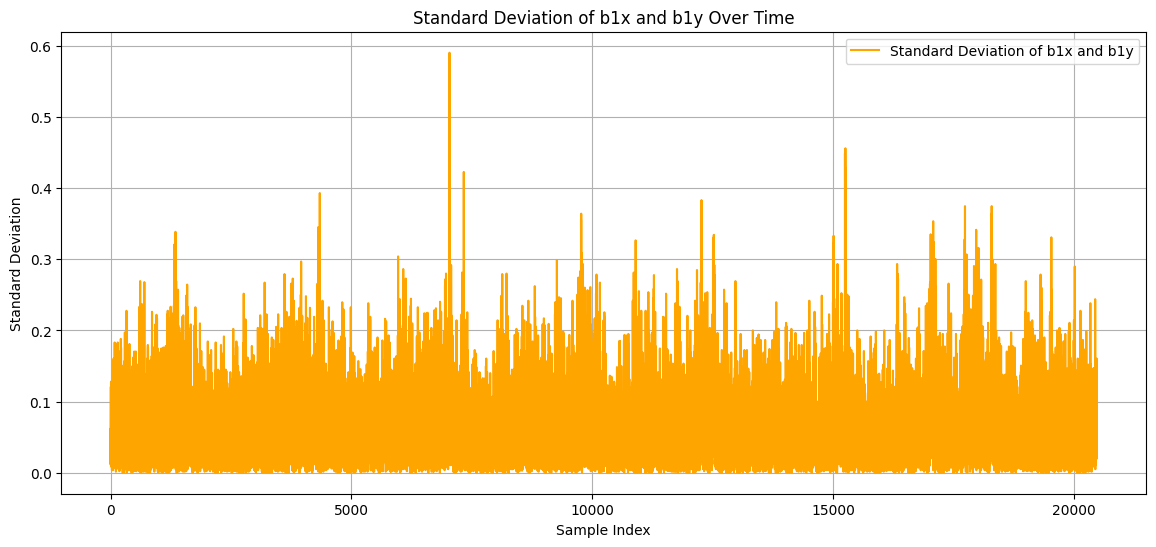

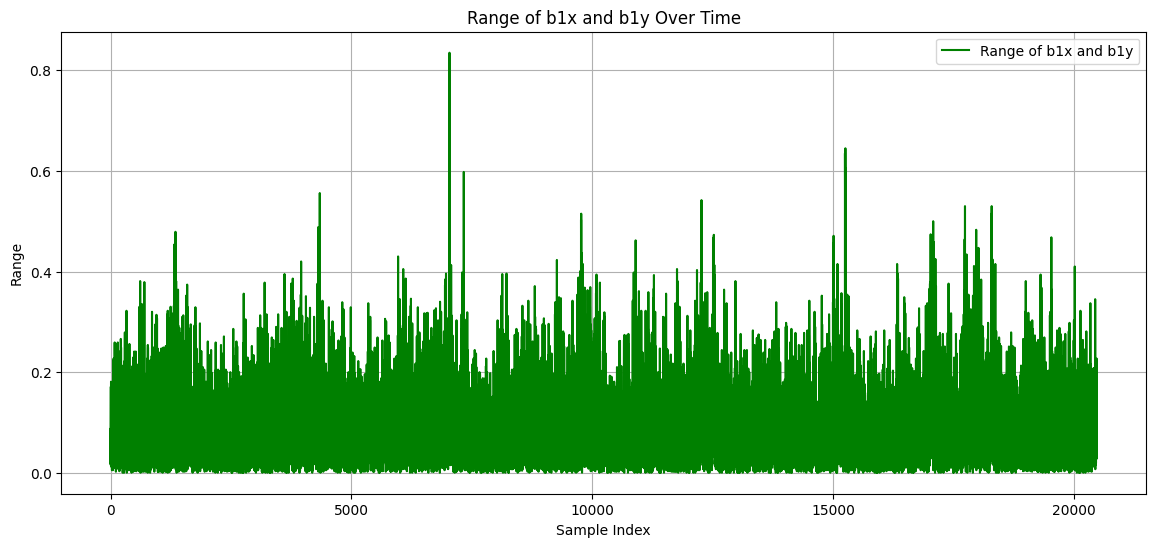

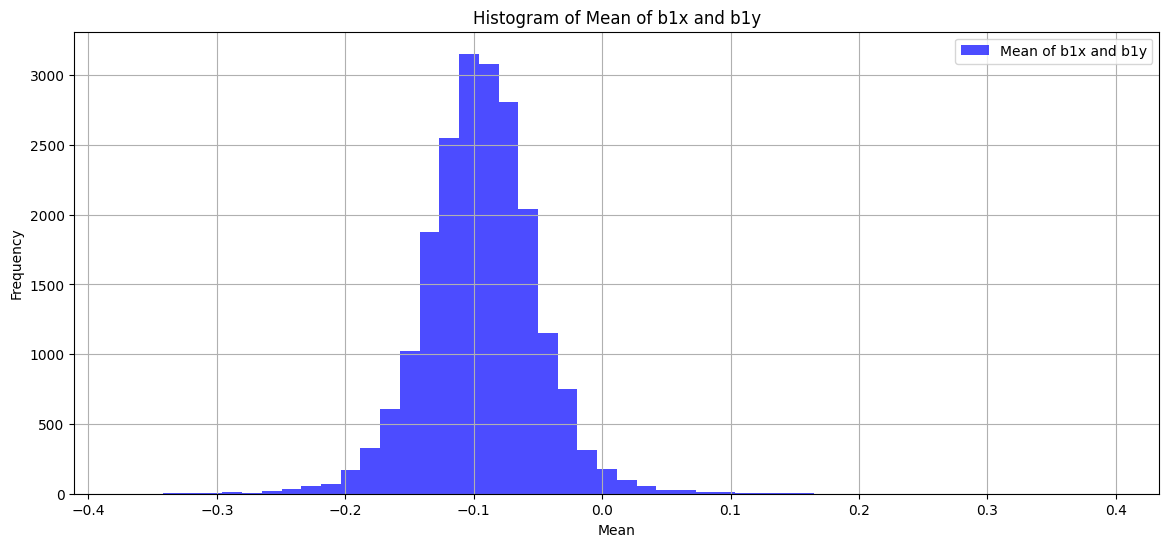

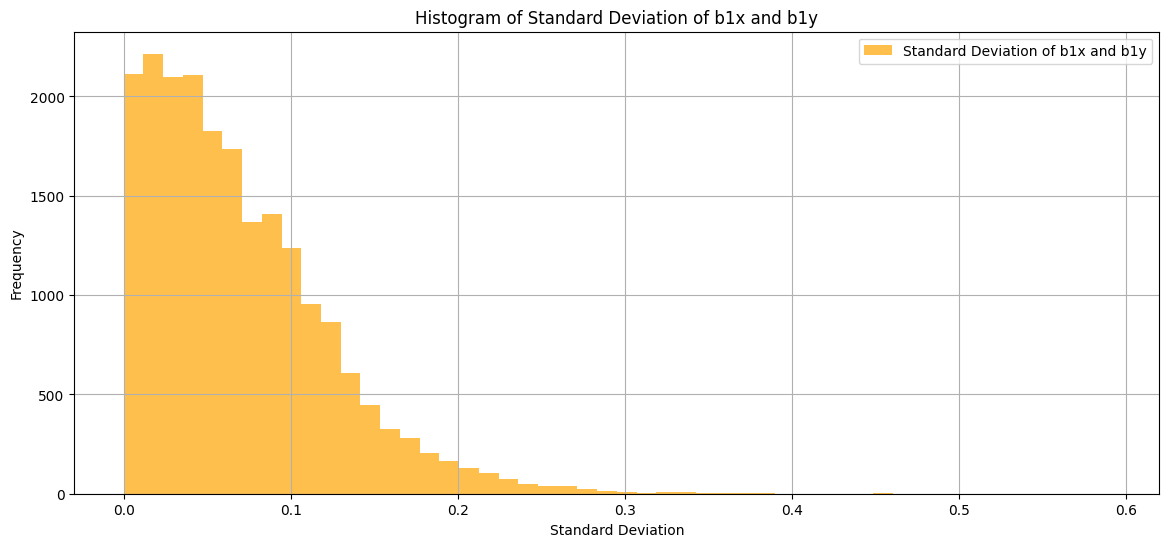

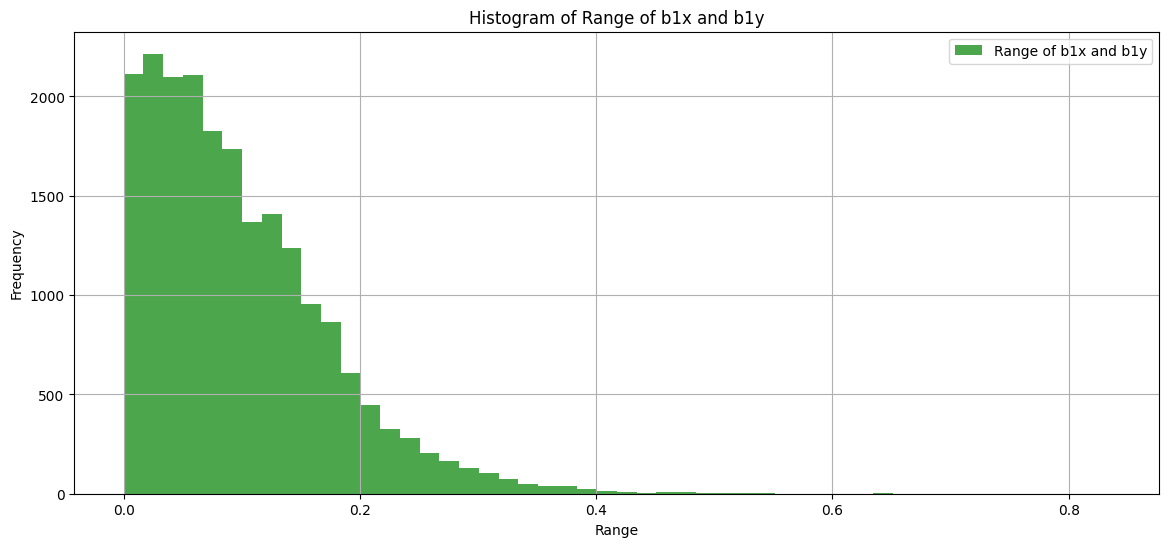

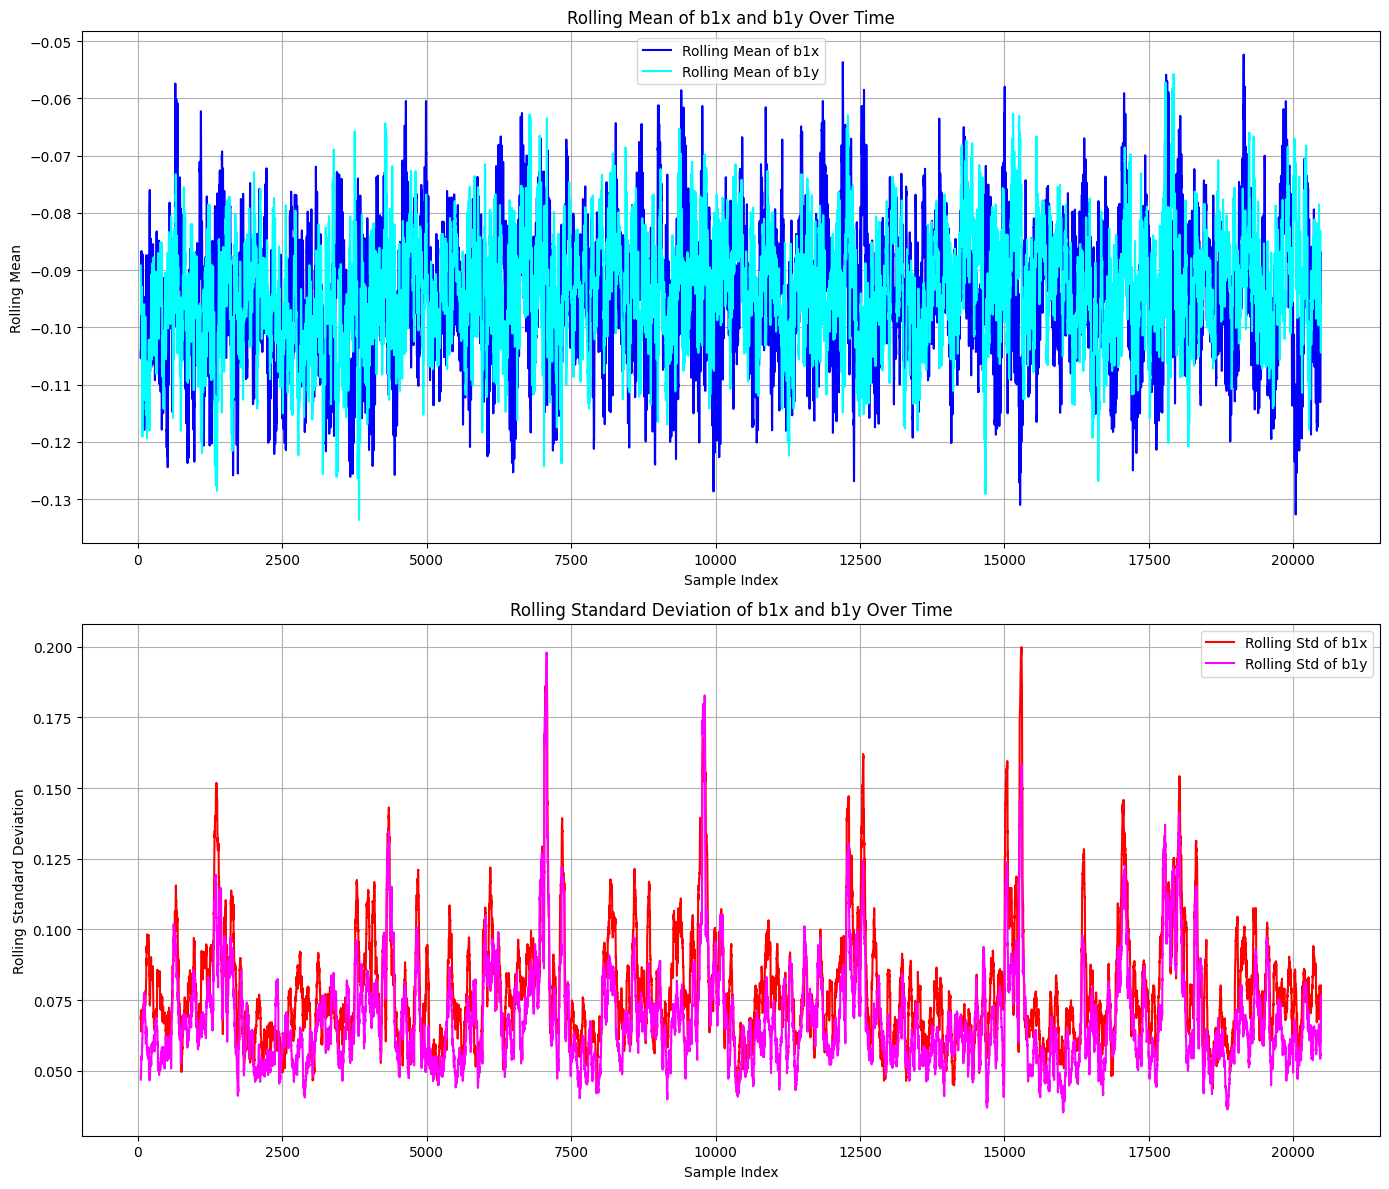

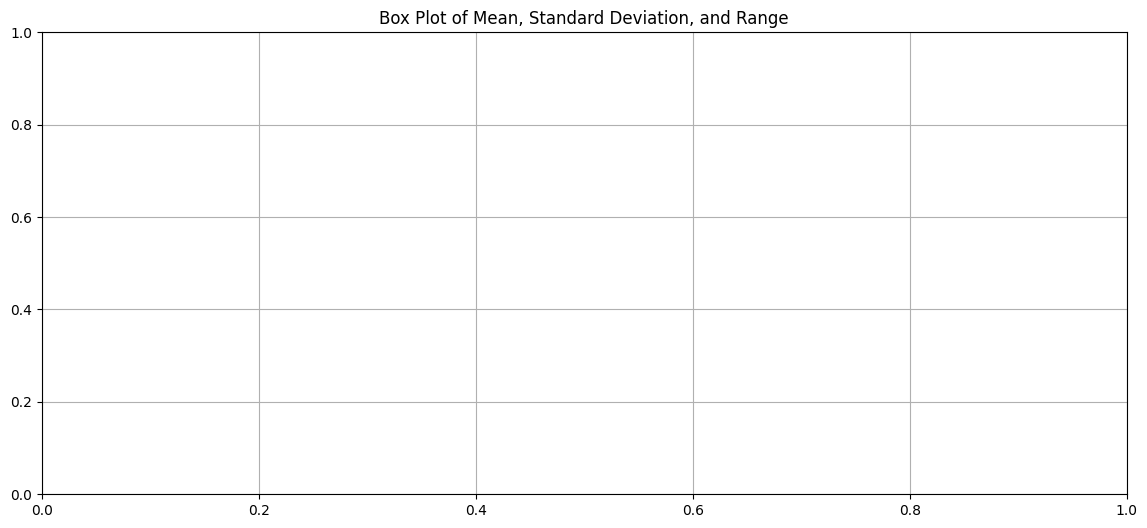

In [29]:
# Line plots for trends over time
plt.figure(figsize=(14, 6))
plt.plot(bearing_data_0.index, bearing_data_0['b1_mean'], label='Mean of b1x and b1y')
plt.xlabel('Sample Index')
plt.ylabel('Mean')
plt.title('Mean of b1x and b1y Over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(bearing_data_0.index, bearing_data_0['b1_std'], label='Standard Deviation of b1x and b1y', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of b1x and b1y Over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(bearing_data_0.index, bearing_data_0['b1_range'], label='Range of b1x and b1y', color='green')
plt.xlabel('Sample Index')
plt.ylabel('Range')
plt.title('Range of b1x and b1y Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Histograms for distribution
plt.figure(figsize=(14, 6))
plt.hist(bearing_data_0['b1_mean'], bins=50, color='blue', alpha=0.7, label='Mean of b1x and b1y')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Mean of b1x and b1y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.hist(bearing_data_0['b1_std'], bins=50, color='orange', alpha=0.7, label='Standard Deviation of b1x and b1y')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviation of b1x and b1y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.hist(bearing_data_0['b1_range'], bins=50, color='green', alpha=0.7, label='Range of b1x and b1y')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Range of b1x and b1y')
plt.legend()
plt.grid(True)
plt.show()

# Rolling statistics
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

axs[0].plot(bearing_data_0.index, bearing_data_0['b1x_rolling_mean'], label='Rolling Mean of b1x', color='blue')
axs[0].plot(bearing_data_0.index, bearing_data_0['b1y_rolling_mean'], label='Rolling Mean of b1y', color='cyan')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Rolling Mean')
axs[0].set_title('Rolling Mean of b1x and b1y Over Time')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(bearing_data_0.index, bearing_data_0['b1x_rolling_std'], label='Rolling Std of b1x', color='red')
axs[1].plot(bearing_data_0.index, bearing_data_0['b1y_rolling_std'], label='Rolling Std of b1y', color='magenta')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Rolling Standard Deviation')
axs[1].set_title('Rolling Standard Deviation of b1x and b1y Over Time')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Box plots to observe spread and detect outliers
plt.figure(figsize=(14, 6))
sns.boxplot(bearing_data_0=bearing_data_0[['b1_mean', 'b1_std', 'b1_range']])
plt.title('Box Plot of Mean, Standard Deviation, and Range')
plt.grid(True)
plt.show()

**Point c**

In [40]:
# Interpolate to handle NaN values
data_interpolated = bearing_data_0.interpolate(method='linear', limit_direction='both')

# Drop any remaining NaN values
data_clean = data_interpolated.dropna()

# Select the features for clustering
features = data_clean[['b1_mean', 'b1_std', 'b1_range', 'b1x_rolling_mean', 'b1y_rolling_mean', 'b1x_rolling_std', 'b1y_rolling_std']]

# Check if there are any NaN values left
print(features.isna().sum())

# Ensure there are enough samples
print(f"Number of samples after interpolating NaN values: {features.shape[0]}")

if features.shape[0] > 0:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Determine the optimal number of clusters using the elbow method
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Choose the optimal number of clusters (let's assume 4 for this analysis based on the elbow curve)
    optimal_clusters = 4
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    data_clean['cluster'] = kmeans.fit_predict(scaled_features)

    # Visualize the clustering result
    plt.figure(figsize=(14, 6))
    plt.scatter(data_clean.index, data_clean['b1_mean'], c=data_clean['cluster'], cmap='viridis')
    plt.xlabel('Sample Index')
    plt.ylabel('Mean of b1x and b1y')
    plt.title('Clustering of Bearing 1 Degradation Stages')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()


b1_mean             0
b1_std              0
b1_range            0
b1x_rolling_mean    0
b1y_rolling_mean    0
b1x_rolling_std     0
b1y_rolling_std     0
dtype: int64
Number of samples after interpolating NaN values: 0


Explanation:
Standardize the Features: We use StandardScaler to standardize the features so that they are on the same scale.
Elbow Method: We plot the sum of squared errors (SSE) for a range of cluster numbers to determine the optimal number of clusters. The "elbow" point, where the SSE starts to level off, indicates the optimal number of clusters.
K-Means Clustering: We apply K-Means clustering with the determined number of clusters and add the cluster labels to the data.
Visualization: We plot the clusters to visualize the stages of degradation.

**Point d**

In [41]:
for cluster in range(optimal_clusters):
    cluster_data = data_clean[data_clean['cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe())

    # You can provide more specific interpretations here based on the data
    # For example:
    if cluster == 0:
        print("Cluster 0: Initial Stage - Low wear and stable operation.")
    elif cluster == 1:
        print("Cluster 1: Moderate Degradation - Increasing variability.")
    elif cluster == 2:
        print("Cluster 2: Severe Degradation - High variability and significant wear.")
    elif cluster == 3:
        print("Cluster 3: Failure Stage - Very high wear and unstable operation.")

KeyError: 'cluster'



### e.1) Do you expect that the bearing will actually go through the definition you defined in d.

Based on the clustering analysis, we can assume that the bearing goes through different stages of degradation, which are represented by the clusters identified. However, this assumption relies on the quality of the clustering and the chosen features. The stages defined by the clusters could reflect actual physical changes in the bearing, but this would need to be validated by comparing these clusters with known physical stages of bearing degradation from domain knowledge or further experimental data.

### e.2) Do you think cluster analysis is a suitable method to attack this problem?

Cluster analysis can be suitable for this problem because it allows us to group data points that exhibit similar characteristics without requiring labeled data. This is particularly useful in exploratory analysis where we may not have predefined stages. However, clustering alone may not capture all the nuances of bearing degradation, and it might need to be combined with other techniques such as supervised learning (if labeled data is available) or domain-specific knowledge to improve accuracy and interpretability.

### e.3) What would you do to improve the model (for example, if you had more time)?

To improve the model, I would consider the following steps:
1. **Feature Engineering**: Create additional features that capture more aspects of the bearing's behavior, such as frequency domain features using FFT, wavelet transforms, or features that capture trends over different time scales.
2. **Data Augmentation**: If possible, collect more data under various operating conditions and degradation scenarios to provide a more comprehensive dataset for training and validation.
3. **Validation with Domain Experts**: Collaborate with domain experts to validate the stages identified by the clustering and refine the features used based on their feedback.
4. **Combine with Supervised Learning**: If labeled data is available, use supervised learning techniques to train a model that can classify the stages of degradation. This can be used to validate the clusters or to provide a more precise classification.
5. **Model Comparison**: Compare different clustering algorithms (e.g., DBSCAN, hierarchical clustering) and evaluate their performance to ensure robustness in stage identification.
6. **Anomaly Detection**: Incorporate anomaly detection techniques to identify unexpected behavior or early signs of failure that may not be captured by the clustering model.

By following these steps, the accuracy and robustness of the model in identifying the stages of bearing degradation can be improved.